# --------------------------------MINI PROJECT NO.1 ( EDA ) --------------------------------------
                                 

### --------------------LET'S FIND OUT SOME HIDDEN TRENDS OF GAMING INDUSTRIES------------------------------------

# IMPORTING PACKAGES

In [8]:
import numpy as np
import pandas as pd
pd.set_option ('mode.chained_assignment',None)
pd.set_option ('display.max_colwidth',-1)
pd.options.display.max_columns=50

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [9]:
import seaborn as sns 
sns.set(style='whitegrid',font_scale=1.3,color_codes=True)

In [10]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install chart--studio

Note: you may need to restart the kernel to use updated packages.


In [12]:
from plotly .offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# LOADING DATA

In [13]:
gdata= pd.read_csv('Video Games Sales.csv')
gdata.head()


,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [14]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


###AS WE CAN SEE there is no null values in our data

In [15]:
gdata.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


##here we can see only review column has "normal distribution" otherwise all columns are skewed 

# PANDAS PROFILING BEFORE DATA PREPROCESSING

In [16]:
import pandas
!pip install pandas-profiling

In [17]:
import pandas_profiling
'''
profile = gdata.profile_report(title ='pandas frofiling report before data preprocessing')
profile.to_file (output_file = "profile_before_preprocessing.html")

'''

'\nprofile = gdata.profile_report(title =\'pandas frofiling report before data preprocessing\')\nprofile.to_file (output_file = "profile_before_preprocessing.html")\n\n'

In [19]:
profile=profile=pandas_profiling.ProfileReport(gdata)

In [20]:
profile.to_file(output_file ="gdata_profiling_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA PREPROCESSING

### we see in pandas profiling report that column "df_index" and "Rank" are just like sereal number so we drop those columns

In [91]:
gdata.drop(['df_index','Rank'],axis=1,inplace=True)

In [92]:
gdata.head()

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


## dealing with nul values in column "year"

In [21]:
gdata['Year'].unique()  #Here we can se that year column has some "nan" values and we need to fix them

array([2006., 1985., 2008., 2009., 1989., 1984., 2005., 1999., 2007.,
       2004., 1990., 2010., 1988., 2002., 2001., 2011., 1998., 1996.,
       2012., 2000., 1992., 1997., 1993., 1994., 2003., 1986.,   nan,
       1995., 1991., 1987., 1983.])

In [22]:
gdata['Year']=gdata['Year'].astype(str)  # converting "year" column into string for further process

In [23]:
year=gdata[gdata['Year'].str.contains('nan')].index  #chicking that how many indexes are with nan value
print(year)

Int64Index([ 143,  253,  301,  373,  434,  523,  524,  573,  582,  646,  746,
             936, 1016, 1030, 1275, 1318, 1326, 1386, 1424, 1526, 1554, 1631,
            1676, 1716, 1752, 1759, 1784, 1819, 1899],
           dtype='int64')


In [24]:
gdata['Year'].mode()  # for getting mode of "year"column

0    2008.0
Name: Year, dtype: object

In [25]:
gdata.iloc[year]=gdata.iloc[year].replace('nan',2008)  #since it is categorical data i we replace nun values with mode.
gdata.iloc[year]  #checking our result if it is good or not.

,df_index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
143,143,144,Madden NFL 2004,PS2,2008,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,87.00
253,253,254,RollerCoaster Tycoon,PC,2008,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
301,301,302,FIFA Soccer 2004,PS2,2008,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
373,373,374,wwe Smackdown vs. Raw 2006,PS2,2008,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,91.00
434,434,435,LEGO Batman: The Videogame,Wii,2008,Adventure,Warner Bros. Interactive Entertainment,1.59,0.86,0.00,0.27,2.72,80.00
523,523,524,Rock Band,X360,2008,Misc,Electronic Arts,1.88,0.31,0.00,0.21,2.40,77.00
524,524,525,Frogger's Adventures: Temple of the Frog,GBA,2008,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
573,573,574,LEGO Indiana Jones: The Original Adventures,Wii,2008,Adventure,LucasArts,1.44,0.57,0.00,0.21,2.22,81.00
582,582,583,Call of Duty 3,Wii,2008,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
646,646,647,Rock Band,Wii,2008,Misc,MTV Games,1.31,0.54,0.00,0.20,2.05,80.13


# in profiling report we saw that column "publisher" has some "nan" and some "unknown" values so we need to fix them too


In [26]:
gdata['Publisher']=gdata['Publisher'].astype(str)  # converting "publisher"column values into string for further process

publisher=gdata[gdata['Publisher'].str.contains('nan')].index # getting those indexes has "nan"values
print(publisher)

Int64Index([373, 1016], dtype='int64')


In [149]:
gdata['Publisher'].mode() # finding mode values of publisher

0    Electronic Arts
Name: Publisher, dtype: object

In [27]:
gdata.iloc[publisher]=gdata.iloc[publisher].replace('nan','Electronic Arts') # replacing mode value from "nan"value 
gdata.iloc[publisher]

,df_index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
373,373,374,wwe Smackdown vs. Raw 2006,PS2,2008,Fighting,Electronic Arts,1.57,1.02,0.0,0.41,3.00,91.00
1016,1016,1017,Triple Play 99,PS,2008,Sports,Electronic Arts,0.81,0.55,0.0,0.10,1.46,69.72


In [28]:
[gdata['Publisher'].value_counts()['Unknown']] # checking how many rows have "unknown" values 

[14]

In [29]:
gdata['Publisher'].mode() #getting mode of "publisher"column

0    Electronic Arts
Name: Publisher, dtype: object

In [159]:
gdata['Publisher']=gdata['Publisher'].astype(str).replace('Unknown','Electronic Arts') #Replacing "unknown" values from mode value
gdata['Publisher'].unique() #checking that we have no more unknown values

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'THQ', 'Disney Interactive Studios',
       'Acclaim Entertainment', 'Level 5', 'MTV Games', 'Codemasters',
       'id Software', 'Havas Interactive', 'Majesco Entertainment',
       'Midway Games', 'Hudson Soft', 'JVC', 'Valve Software',
       '989 Studios', 'Maxis', 'Square EA', 'Tecmo Koei', 'Gotham Games',
       'Deep Silver', 'Infogrames', 'Arena Entertainment', 'Mindscape',
       'Banpresto', 'NCSoft', 'Crave Entertainment

### Converting float values into int value for "year" columns 

In [31]:
gdata.loc[gdata['df_index'][250:255]] # Checki value that we replace "nan" values with in walue and
                                      # we don'n need any float values in this column 
                                      # so we chancge all the float values into int64

,df_index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
250,250,251,EA Sports Active,Wii,2009.0,Sports,Electronic Arts,2.05,1.32,0.06,0.40,3.84,83.25
251,251,252,Assassin's Creed: Revelations,PS3,2011.0,Action,Ubisoft,1.27,1.79,0.07,0.70,3.83,80.05
252,252,253,The Legend of Zelda: Link's Awakening,GB,1992.0,Adventure,Nintendo,2.21,0.96,0.54,0.13,3.83,89.00
253,253,254,RollerCoaster Tycoon,PC,2008,Strategy,Electronic Arts,3.82,0.01,0.00,0.00,3.83,87.00
254,254,255,Flash Focus: Vision Training in Minutes a Day,DS,2007.0,Misc,Nintendo,0.85,1.54,1.05,0.35,3.79,61.00


In [32]:
gdata['Year']=gdata['Year'].astype(float).astype(np.int64) # converting all float values into int64

In [33]:
gdata.head() # chicking

,df_index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


# PANDAS POST PROFILING

### PANDAS PROFILING AFTER DATA PREPROCESSING

#### After all the preprocessing (dealing with  nan values ,unknown  values ,converting values ' int to str ' , ' float to int' etc. let's generate pandas profiling report after preprocessing
     

In [98]:
profile=profile=pandas_profiling.ProfileReport(gdata)

# profile.to_file(output_file="game_data_report_after_processing.html")

# EXPLORATORY DATA ANALYSIS (EDA)

### Q.1:  Which type of games have highest sales 

Text(0.5, 1.0, 'which type of games have highest sales ')

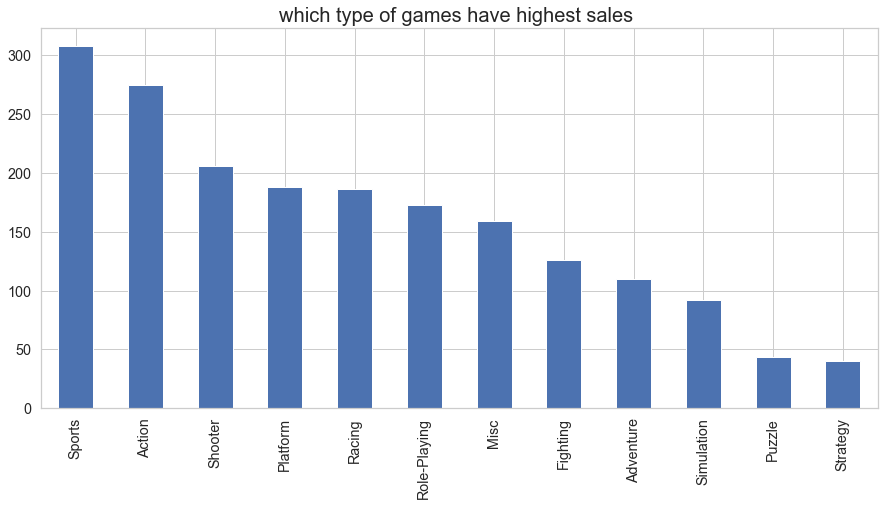

In [160]:
plt.figure(figsize=(15,7))

gdata['Genre'].value_counts().plot(kind='bar')
plt.title('which type of games have highest sales ',fontsize=20)

#### Here we can see that sports genre has maximum buyer and the action and shooter genre are in 2nd and 3rd position 

### Q2:  Which platform have been highly used by gamers

Text(0.5, 1.0, 'which platform is highest use for games')

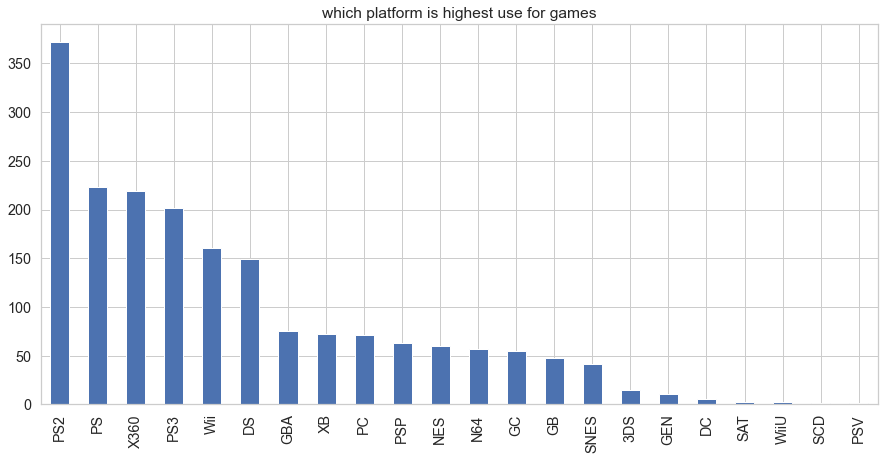

In [34]:
plt.figure(figsize=(15,7))
gdata['Platform'].value_counts().plot(kind = 'bar',)
plt.title('which platform is highest use for games')

#### From the study of above graf we can simply understand popularity os playstations cuz PS2  is largest audience .

### Q2:  In which year games have maximum sells

Text(0.5, 1.0, 'in which year maximum games are launch')

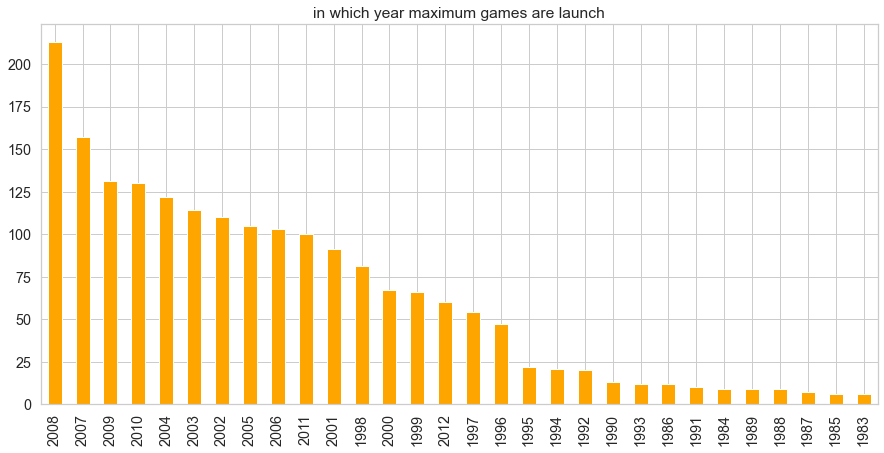

In [35]:
plt.figure(figsize=(15,7))
gdata['Year'].value_counts().plot(kind = 'bar',color='orange')


plt.title('in which year maximum games are selled')

### Q3: Which publisher published higher games of all times

Text(0.5, 1.0, 'which publisher published highest games')

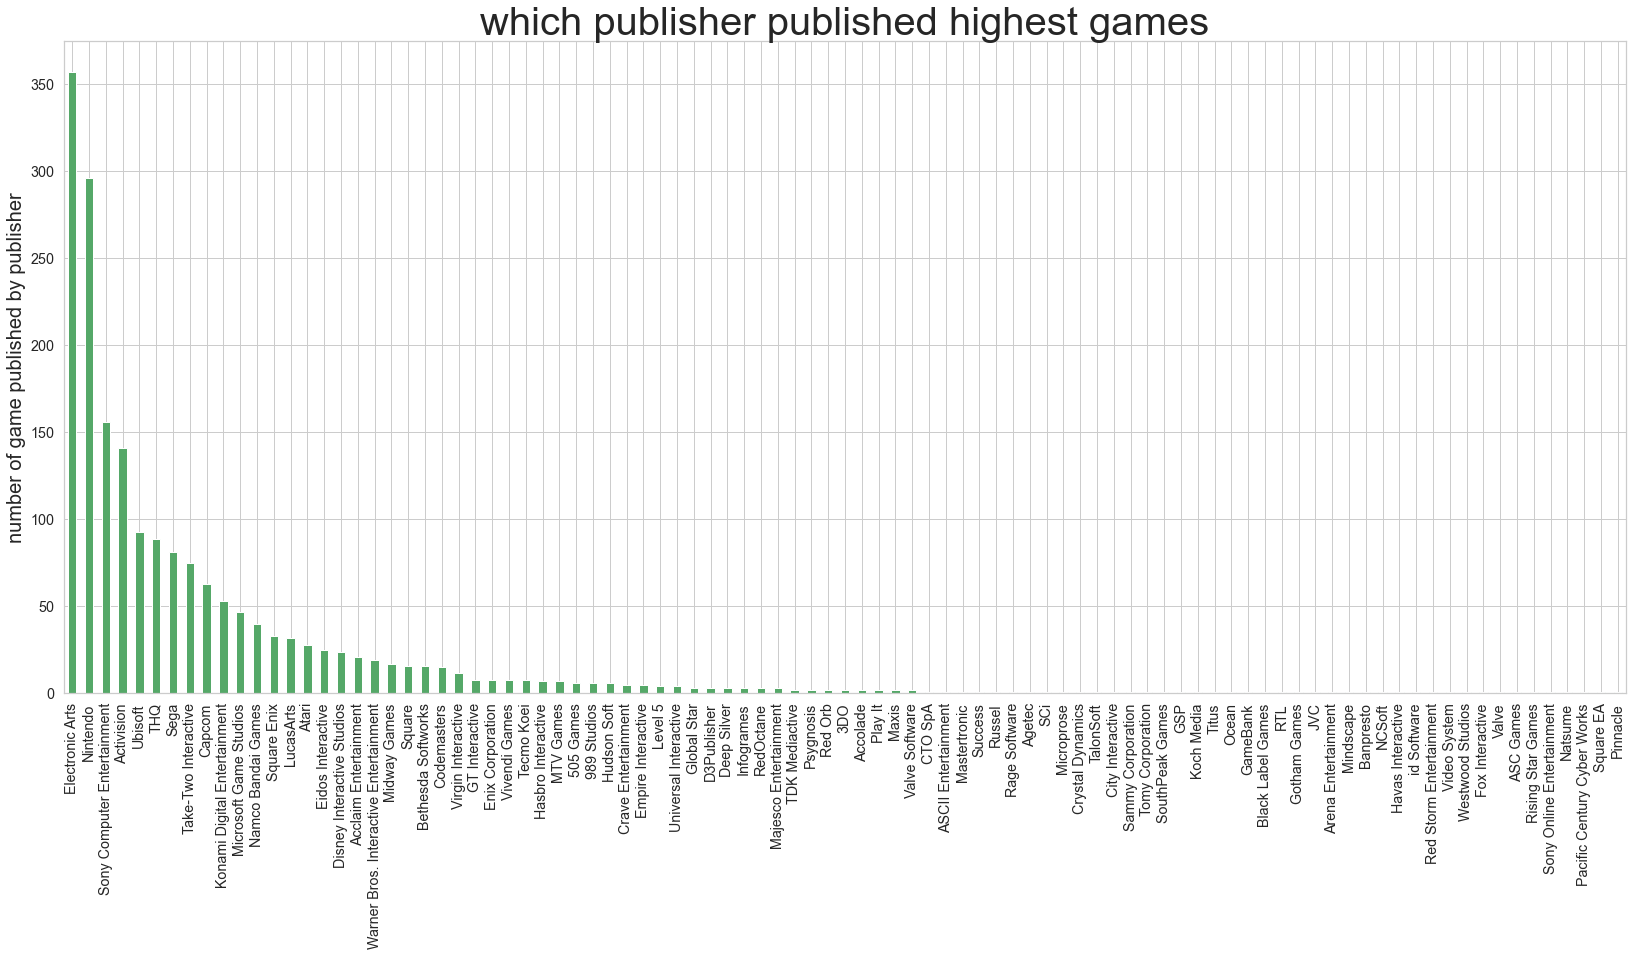

In [106]:
from importlib import reload
matplotlib=reload(plt)
plt.figure(figsize=(28,12))
gdata['Publisher'].value_counts().plot(kind='bar',color='g')
plt.ylabel('number of game published by publisher',fontsize=20)
plt.title('which publisher published highest games',fontsize=40)



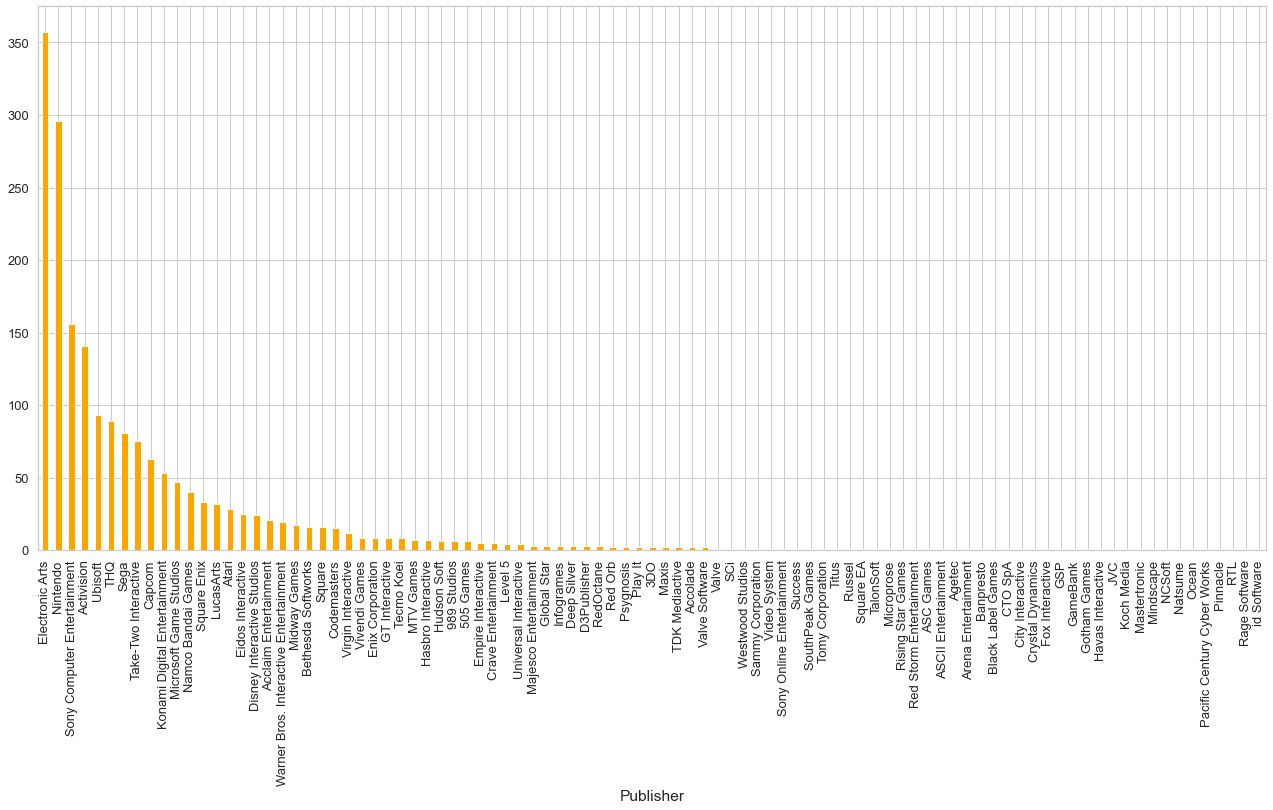

In [104]:
gdata.groupby('Publisher')['Game Title'].count().sort_values(ascending=False).plot(kind='bar',figsize=(22,10),fontsize=13,color='orange')

plt.ylabel=('number of games')

### Q4: Who got best positive review by gamers 

Text(0.5, 1.0, 'which is best publisher according to reviews')

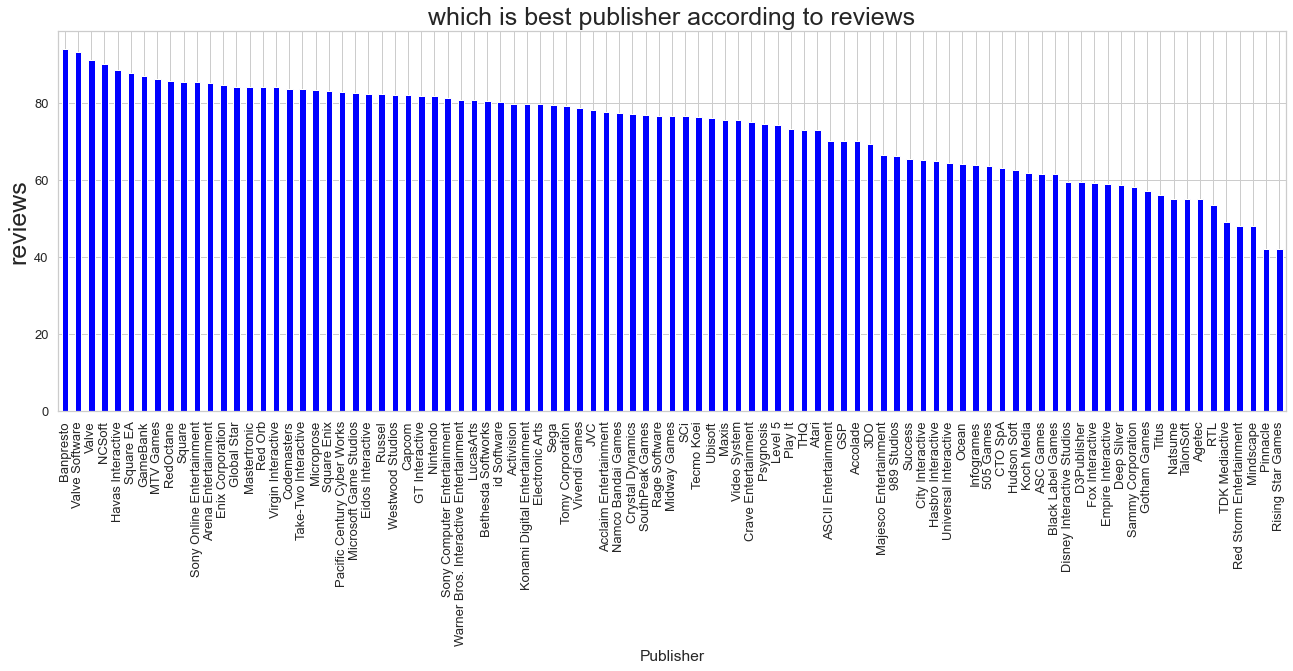

In [161]:
gdata.groupby('Publisher')['Review'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(22,7),fontsize=13,color='blue')
plt.ylabel('reviews',fontsize=25)
plt.title('which is best publisher according to reviews',fontsize=25)

#### Banpresto got higher ratings by gamer  though Electronic arts pubished highest games but people like banpresto .

### Q5: trying to find correlation between all the features

Text(0.5, 1.0, 'correlation between feature')

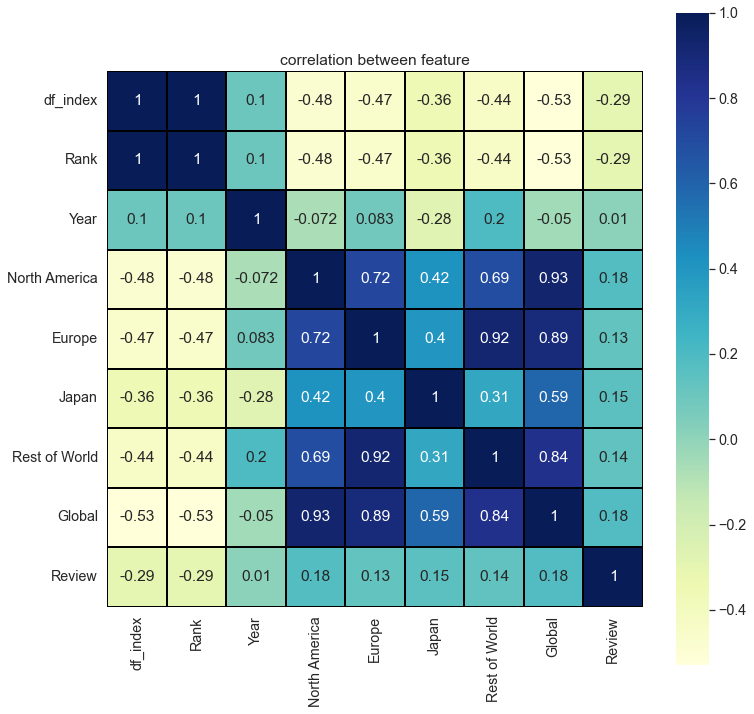

In [90]:
corr=gdata.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,linewidth=0.01,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title('correlation between feature')

### Q6: seles of top selling games in each region

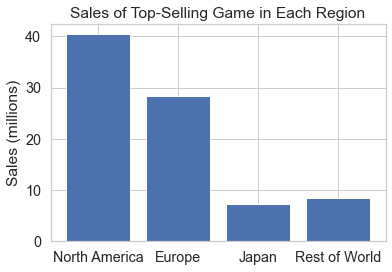

In [85]:
sales_by_game = gdata.groupby("Game Title").sum()[["North America", "Europe", "Japan", "Rest of World"]]

top_na_sales = sales_by_game.sort_values("North America", ascending=False).head(1)
top_eu_sales = sales_by_game.sort_values("Europe", ascending=False).head(1)
top_jp_sales = sales_by_game.sort_values("Japan", ascending=False).head(1)
top_row_sales = sales_by_game.sort_values("Rest of World", ascending=False).head(1)

top_na_game = top_na_sales.index[0]
top_eu_game = top_eu_sales.index[0]
top_jp_game = top_jp_sales.index[0]
top_row_game = top_row_sales.index[0]

na_sales = gdata[gdata["Game Title"] == top_na_game]["North America"].sum()
eu_sales = gdata[gdata["Game Title"] == top_eu_game]["Europe"].sum()
jp_sales = gdata[gdata["Game Title"] == top_jp_game]["Japan"].sum()
row_sales = gdata[gdata["Game Title"] == top_row_game]["Rest of World"].sum()

plt.bar(range(4), [na_sales, eu_sales, jp_sales, row_sales], align="center")
plt.xticks(range(4), ["North America", "Europe", "Japan", "Rest of World"])
plt.ylabel("Sales (millions)")
plt.title("Sales of Top-Selling Game in Each Region")
plt.show()

### Q7: which region has higest seles over the time

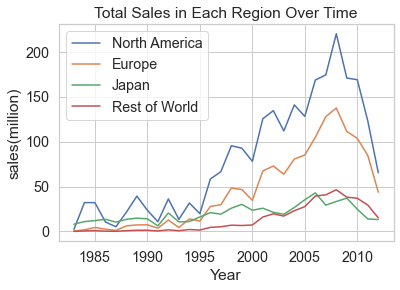

In [82]:
from importlib import reload
matplotlib=reload(plt)

sales_by_year = gdata.groupby("Year").sum()[["North America", "Europe", "Japan", "Rest of World"]]


plt.plot(sales_by_year.index, sales_by_year["North America"], label="North America")
plt.plot(sales_by_year.index, sales_by_year["Europe"], label="Europe")
plt.plot(sales_by_year.index, sales_by_year["Japan"], label="Japan")
plt.plot(sales_by_year.index, sales_by_year["Rest of World"], label="Rest of World")
plt.xlabel("Year")
plt.ylabel('sales(million)')
plt.title("Total Sales in Each Region Over Time")
plt.legend()
plt.show()


#### Here we can see north america is always on 1st in terms of highest selling and till 1995 japan is on 2nd number in highest selling and after that europe take 2nd place and japan got 3rd place till 2006 and after that japan goes to 4rth number . 

### Q8: Which game genre get highest popularity  in North America in terms of sales 

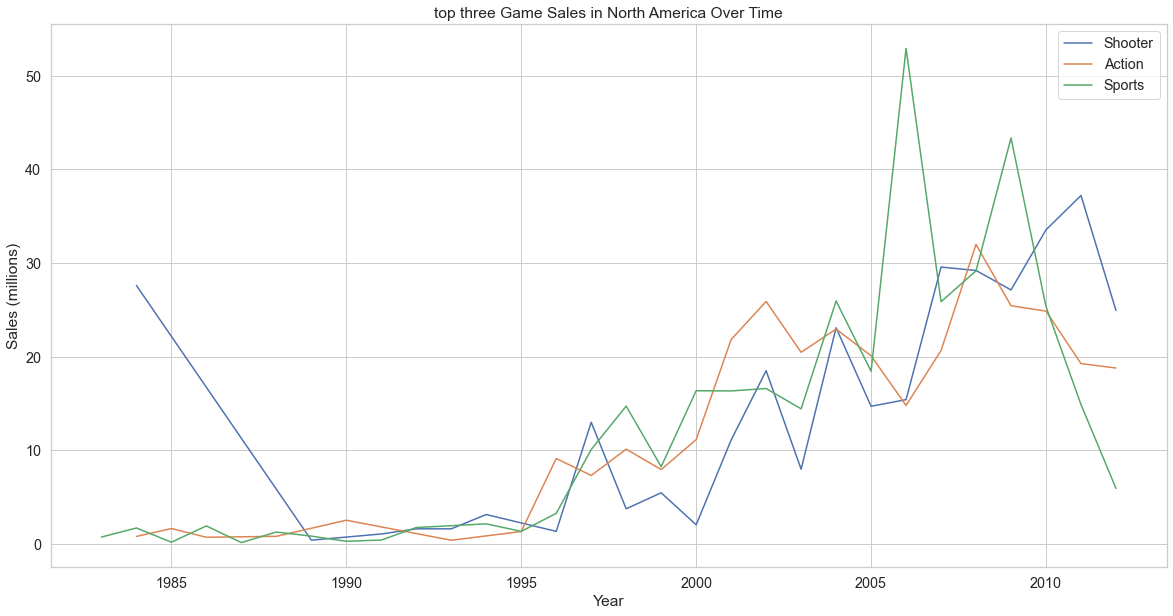

In [146]:
sales_by_year_genre = gdata.groupby(["Year", "Genre"]).sum()[["North America", "Europe", "Japan", "Rest of World"]]

action_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Action"]
sports_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Sports"]
shooter_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Shooter"]


plt.figure(figsize=(20,10))
plt.plot(shooter_sales.index.get_level_values(0),shooter_sales["North America"],label="Shooter")
plt.plot(action_sales.index.get_level_values(0), action_sales["North America"], label="Action")
plt.plot(sports_sales.index.get_level_values(0), sports_sales["North America"], label="Sports")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.title("top three Game Sales in North America Over Time")
plt.legend()
plt.show()

#### Here we see kind of mixed reacton untill 2005 between 2005 to 2010 sports games are highly popular 

### Q9: Which game genre get highest popularity  in North America in terms of sales 

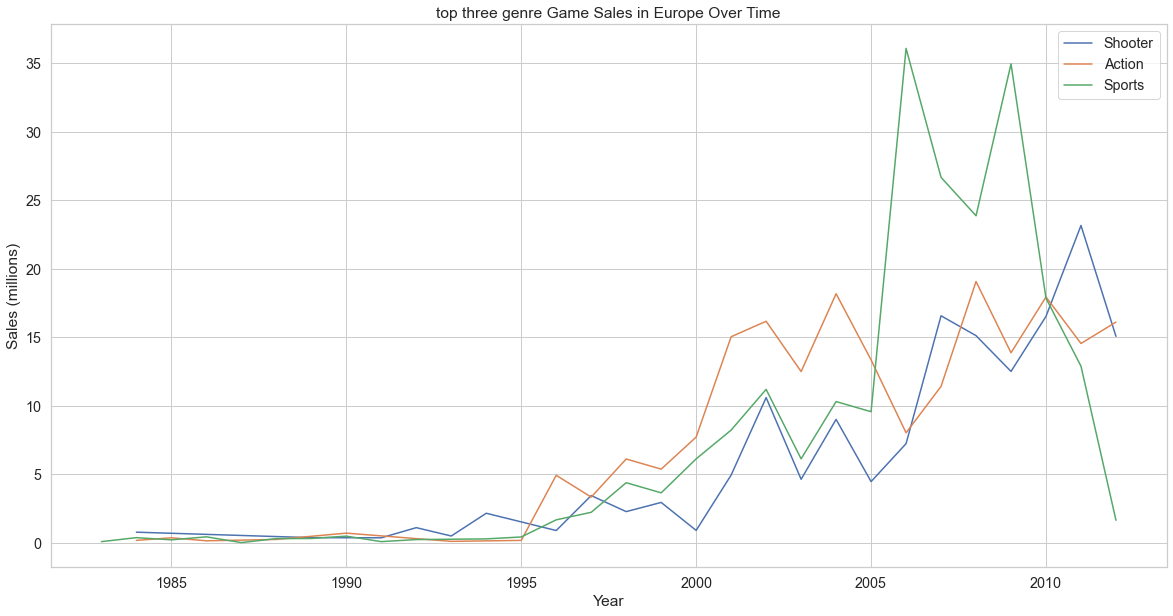

In [147]:
action_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Action"]
sports_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Sports"]
shooter_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Shooter"]

plt.figure(figsize=(20,10))
plt.plot(shooter_sales.index.get_level_values(0),shooter_sales["Europe"],label="Shooter")
plt.plot(action_sales.index.get_level_values(0), action_sales["Europe"], label="Action")
plt.plot(sports_sales.index.get_level_values(0), sports_sales["Europe"], label="Sports")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.title("top three genre Game Sales in Europe Over Time")
plt.legend()
plt.show()

#### This europian graf is look like similar as North American graf

### Q10: Which game genre get highest popularity  in North America in terms of sales 

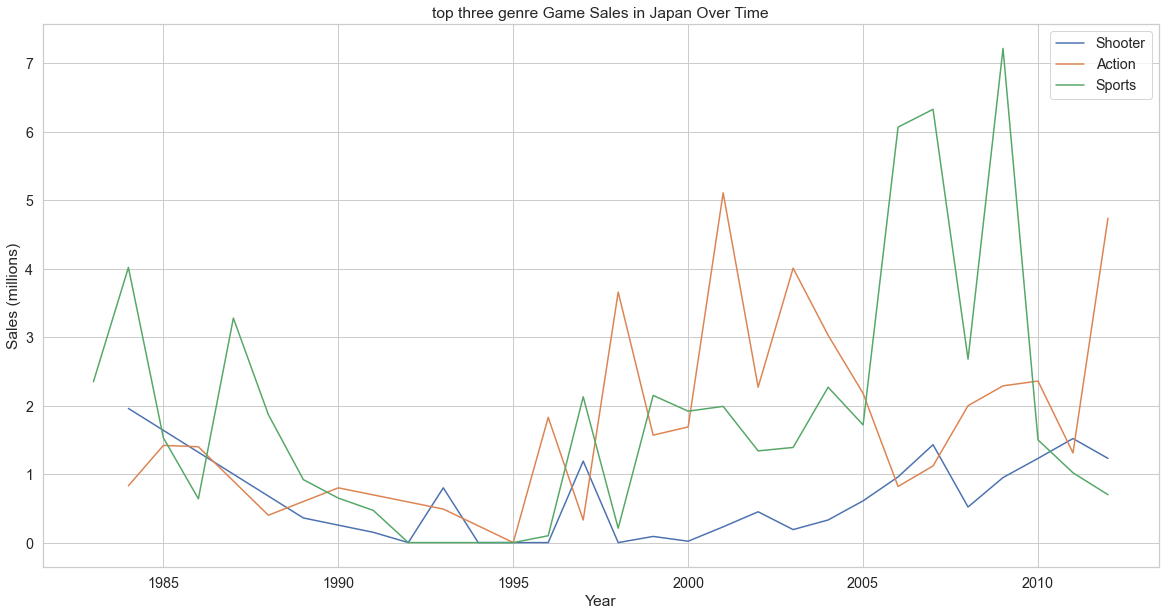

In [148]:
action_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Action"]
sports_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Sports"]
shooter_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Shooter"]

plt.figure(figsize=(20,10))
plt.plot(shooter_sales.index.get_level_values(0),shooter_sales["Japan"],label="Shooter")

plt.plot(action_sales.index.get_level_values(0), action_sales["Japan"], label="Action")
plt.plot(sports_sales.index.get_level_values(0), sports_sales["Japan"], label="Sports")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.title("top three genre Game Sales in Japan Over Time")
plt.legend()
plt.show()

#### Here we see that till 1990 sports genre is famous in japan and from 1990 to 2005 action genre is more famous and from 2005 to 2010 again sports genre is very famous .

# ------------------------------------------- THE END ---------------------------------------------------